In [21]:
import os
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1fw2xUFwISy2dXnxPx7zGp6y5Ivqc8OzI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1fw2xUFwISy2dXnxPx7zGp6y5Ivqc8OzI
To: /content/CNN_dataset.zip
100% 100M/100M [00:00<00:00, 202MB/s] 


In [23]:
!unzip -o CNN_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CNN_dataset/CXR/009317.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009317.jpeg  
  inflating: CNN_dataset/CXR/002808.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._002808.jpeg  
  inflating: CNN_dataset/CXR/000835.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._000835.jpeg  
  inflating: CNN_dataset/CXR/001727.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001727.jpeg  
  inflating: CNN_dataset/CXR/004525.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._004525.jpeg  
  inflating: CNN_dataset/CXR/006518.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._006518.jpeg  
  inflating: CNN_dataset/CXR/008855.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._008855.jpeg  
  inflating: CNN_dataset/CXR/009747.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009747.jpeg  
  inflating: CNN_dataset/CXR/001377.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001377.jpeg  
  inflating: CNN_dataset/CXR/004175.jpeg  
  inflating: __MACOSX/CNN_dataset

In [25]:


dataFolder = './CNN_dataset/'

typeNames = sorted([x for x in os.listdir(dataFolder) if os.path.isdir(os.path.join(dataFolder, x))])
typeCount = len(typeNames)
imgFiles = [[os.path.join(dataFolder, className, x) 
                for x in os.listdir(os.path.join(dataFolder, className))] 
               for className in typeNames]

imgLabelList = []
imgFileList = []

for i, className in enumerate(typeNames):
    imgFileList.extend(imgFiles[i])
    imgLabelList.extend([i] * len(imgFiles[i]))
totalNum = len(imgFileList)




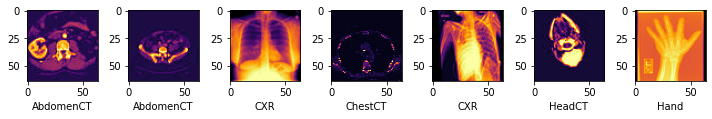

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from PIL import Image
import cv2

plt.subplots(1, 7, figsize=(10, 15))

for i,k in enumerate(np.random.randint(totalNum, size=7)):
    img = Image.open(imgFileList[k])
    arr = np.array(img)
    plt.subplot(1, 7, i + 1)
    plt.xlabel(typeNames[imgLabelList[k]])
    plt.imshow(arr, cmap='inferno')
plt.tight_layout()
plt.show()

In [27]:
testFracValue = 0.18
train_value_X, train_value_Y = [], []
test_value_X, test_value_Y = [], []

for i in range(totalNum):
    ran = np.random.random()
    if ran < testFracValue:
        test_value_X.append(cv2.imread(imgFileList[i]))
        test_value_Y.append(imgLabelList[i])
    else:
        train_value_X.append(cv2.imread(imgFileList[i]))
        train_value_Y.append(imgLabelList[i])

print("Training value =",len(train_value_X), "\n Testing value =",len(test_value_X))

Training value = 40957 
 Testing value = 9043


In [28]:
train_value_X = np.array(train_value_X)
train_value_Y = np.array(train_value_Y)
test_value_X  = np.array(test_value_X)
test_value_Y  = np.array(test_value_Y)


train_value_Y = to_categorical(train_value_Y, typeCount)
test_value_Y = to_categorical(test_value_Y, typeCount)
test_value_Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [29]:

train_value_X = train_value_X.astype('float32') / 255
test_value_X = test_value_X.astype('float32') / 255

     

In [30]:

neural_model = Sequential()
neural_model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,3))) 
neural_model.add(MaxPooling2D(pool_size=(2,2)))
neural_model.add(Dropout(0.5))
neural_model.add(Flatten())
neural_model.add(Dense(64, activation='relu'))
neural_model.add(Dropout(0.5))
neural_model.add(Dense(5, activation='softmax'))
neural_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                2097216   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [31]:
neural_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [32]:
neural_modelLog=neural_model.fit(train_value_X, train_value_Y,
          batch_size=65,
          epochs=8,
          verbose=1,
          validation_split=.15)

Epoch 1/8
536/536 [==============================] - 7s 10ms/step - loss: 0.3289 - accuracy: 0.8708 - val_loss: 0.0044 - val_accuracy: 0.9998
Epoch 2/8
536/536 [==============================] - 4s 8ms/step - loss: 0.1026 - accuracy: 0.9592 - val_loss: 7.9525e-06 - val_accuracy: 1.0000
Epoch 3/8
536/536 [==============================] - 5s 9ms/step - loss: 0.0683 - accuracy: 0.9740 - val_loss: 6.5057e-05 - val_accuracy: 1.0000
Epoch 4/8
536/536 [==============================] - 5s 8ms/step - loss: 0.0527 - accuracy: 0.9794 - val_loss: 9.6518e-04 - val_accuracy: 1.0000
Epoch 5/8
536/536 [==============================] - 5s 9ms/step - loss: 0.0506 - accuracy: 0.9822 - val_loss: 1.0572e-04 - val_accuracy: 1.0000
Epoch 6/8
536/536 [==============================] - 5s 8ms/step - loss: 0.0435 - accuracy: 0.9846 - val_loss: 4.9840e-05 - val_accuracy: 1.0000
Epoch 7/8
536/536 [==============================] - 4s 8ms/step - loss: 0.0400 - accuracy: 0.9866 - val_loss: 7.6746e-05 - val_accur

In [33]:
modelPrediction = neural_model.predict(test_value_X)
modelPredictionLabels = np.argmax(modelPrediction, axis=1)
modelTrueLabels = np.argmax(test_value_Y, axis=1)


confusionMatrix = confusion_matrix(modelTrueLabels, modelPredictionLabels)

print(confusionMatrix)

283/283 [==============================] - 1s 2ms/step
[[1843    0    0    0    0]
 [   0 1785    0    5    0]
 [   0    0 1797    0    0]
 [   0    5    0 1799    2]
 [   0    0    0    0 1807]]


In [35]:
print(classification_report(modelTrueLabels,modelPredictionLabels, target_names=typeNames,digits=5))


              precision    recall  f1-score   support

   AbdomenCT    1.00000   1.00000   1.00000      1843
         CXR    0.99721   0.99721   0.99721      1790
     ChestCT    1.00000   1.00000   1.00000      1797
        Hand    0.99723   0.99612   0.99668      1806
      HeadCT    0.99889   1.00000   0.99945      1807

    accuracy                        0.99867      9043
   macro avg    0.99867   0.99867   0.99867      9043
weighted avg    0.99867   0.99867   0.99867      9043

